In [33]:
%pylab inline
from lib import price_utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
reload(price_utils)
pd.options.display.float_format = '£{:,.2f}'.format


month = '2016-09-01'

Populating the interactive namespace from numpy and matplotlib


# Top ccg-presentation savings

The SQL for this is abstracted into the `price_utils` library, q.v. for details.

We normalise prescriptions to their generic equivalent.  See [the README](https://github.com/ebmdatalab/price-per-dose/blob/master/README.md) for details.

The following is sorted by possible savings at the top decile. It tells us that CCG 13T  had the single biggest saving opportunity: to save £33,600 on its purchase of 8258 flu vaccines. It paid £9.92 per dose, when the lowest decile paid £5.85 per dose.

In [35]:
top_1000_ccg = price_utils.get_savings(group_by='pct', month=month, limit=1000)

In [36]:
top_1000_ccg.head()

,bnf_presentation,bnf_chemical,pct,generic_presentation,category,brand_count,lowest_decile,quantity,price_per_dose,possible_savings
0,Influenza_Vac Inact 0.5ml Pfs,Influenza,13T,1404000H0AAAFAF,NP8,14,£5.85,8259,£9.92,"£33,561.56"
1,Sucralfate_Enem 2g In 50ml,Sucralfate,03C,0107010S0AAAGAG,NP8,1,£12.17,60,£256.50,"£14,659.83"
2,"Dalteparin Sod_Inj 25,000u/ml 0.72ml Pfs",Dalteparin Sodium,10Q,0208010L0AAAIAI,NP8,1,£10.16,110,£137.41,"£13,996.85"
3,Influenza_Vac Inact 0.5ml Pfs,Influenza,05H,1404000H0AAAFAF,NP8,4,£5.85,4850,£9.10,"£13,843.35"
4,Influenza_Vac Inact 0.5ml Pfs,Influenza,06K,1404000H0AAAFAF,NP8,8,£5.85,5412,£8.77,"£13,840.48"


How do the savings break down by Tariff Part VIII?

In [37]:
top_1000_ccg.to_csv("ccgs-%s.csv" % month)
top_1000_ccg.groupby('category')['possible_savings'].sum()

category
A       £81,754.56 
C      £410,924.00 
M       £52,653.24 
NP8   £1,337,377.29
Name: possible_savings, dtype: float64

## Grouped by CCG

The same data as above, but grouped by CCG

In [38]:
by_ccg = top_1000_ccg.groupby('pct')['possible_savings'] \
  .agg({'Count': 'count', 'Total savings': 'sum'}).sort_values('Total savings', ascending=False)
by_ccg.head()

,Count,Total savings
pct,,
13T,10,"£48,008.55"
09G,14,"£47,538.31"
13P,18,"£43,255.73"
03C,9,"£36,601.69"
06T,7,"£35,762.43"


In [39]:
by_ccg['Total savings'].sum()

1882709.0998112112

## Just focusing on Rich's CCG

In [40]:
by_ccg.loc('savings_presentations_pct')['99P']

Count              £12.00 
Total savings   £23,100.82
Name: 99P, dtype: float64

In [41]:
reload(price_utils)
asd = price_utils.get_savings(for_entity='99P', month=month, limit=None)

In [42]:
asd.sort_values('possible_savings', ascending=False)

,bnf_presentation,bnf_chemical,pct,generic_presentation,category,brand_count,lowest_decile,quantity,price_per_dose,possible_savings
0,Budesonide/Formoterol Inh B/A 200/6(120D,Budesonide,99P,0302000K0AAAMAM,C,254,£29.97,5042,£36.58,"£32,770.43"
1,Pregabalin_Cap 300mg,Pregabalin,99P,0408010AEAAAGAG,C,241,£0.80,93796,£1.12,"£29,241.90"
2,Pregabalin_Cap 150mg,Pregabalin,99P,0408010AEAAAEAE,C,252,£0.80,89637,£1.11,"£27,266.16"
3,Fluticasone/Salmeterol_Inh 125/25mcg120D,Fluticasone Propionate (Inh),99P,0302000N0AABFBF,C,188,£26.25,3212,£34.73,"£26,836.25"
4,Budesonide/Formoterol Inh B/A 400/12(60D,Budesonide,99P,0302000K0AAAUAU,C,236,£29.97,3815,£36.44,"£24,210.45"
5,Pregabalin_Cap 75mg,Pregabalin,99P,0408010AEAAACAC,C,263,£0.80,81763,£1.09,"£23,295.90"
6,Influenza_Vac Inact 0.5ml Pfs,Influenza,99P,1404000H0AAAFAF,NP8,97,£5.85,35736,£6.48,"£22,372.10"
7,Pregabalin_Cap 50mg,Pregabalin,99P,0408010AEAAABAB,C,238,£0.80,57646,£1.10,"£16,673.08"
8,Methocarbamol_Tab 750mg,Methocarbamol,99P,1002020S0AAABAB,A,55,£0.13,43623,£0.48,"£16,082.11"
9,Pregabalin_Cap 100mg,Pregabalin,99P,0408010AEAAADAD,C,205,£0.80,48194,£1.11,"£14,607.99"


In [43]:
# Save it to a cSV

asd.to_csv("99P-full-%s.csv" % month)

# Same thing for practices

In [44]:
top_1000_practice = price_utils.get_savings(group_by='practice',month=month, limit=1000)

In [45]:
top_1000_practice.head()


,bnf_presentation,bnf_chemical,practice,pct,generic_presentation,category,brand_count,lowest_decile,quantity,price_per_dose,possible_savings
0,Sucralfate_Enem 2g In 50ml,Sucralfate,B86030,03C,0107010S0AAAGAG,NP8,1,£12.17,60,£256.50,"£14,659.83"
1,"Dalteparin Sod_Inj 25,000u/ml 0.72ml Pfs",Dalteparin Sodium,K84055,10Q,0208010L0AAAIAI,NP8,1,£10.16,110,£137.41,"£13,996.85"
2,Sod Phenylbut_Liq Spec 1.25g/5ml,Sodium Phenylbutyrate,J82034,11A,0908010P0AAAEAE,NP8,1,£1.09,2500,£5.56,"£11,187.72"
3,Trientine Dihydroch_Cap 300mg,Trientine Dihydrochloride,E83638,07M,0908010S0AAACAC,NP8,1,£22.91,400,£49.99,"£10,831.68"
4,Melatonin_Tab 3mg,Melatonin,H82016,09G,0401010ADAABPBP,NP8,2,£0.75,552,£19.26,"£10,219.03"


In [46]:

top_1000_practice.to_csv("practices-%s.csv" % month)

# What is the distribution of the easiest cost savings?

For each practice, compute and sum its top three savings, then plot these in a histogram.

In [47]:
reload(price_utils)
top_10 = price_utils.top_savings_per_entity(top_n=10, entity='practice')

In [50]:
reload(price_utils)
top_1 = price_utils.top_savings_per_entity(top_n=1, entity='practice', summed=False)
top_1.to_csv("top_saving_for_each_practice_%s.csv" % month)

In [51]:
top_10.describe()

,top_savings_sum
count,"£7,637.00"
mean,"£2,543.88"
std,"£1,697.70"
min,£0.00
25%,"£1,383.77"
50%,"£2,193.78"
75%,"£3,312.10"
max,"£19,133.63"


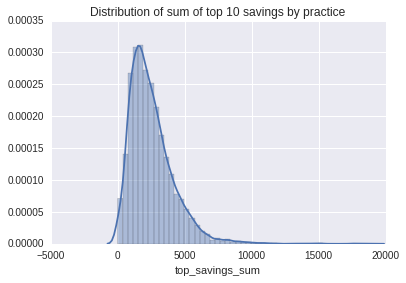

In [52]:
sns.distplot(top_10.top_savings_sum)
plt.title("Distribution of sum of top 10 savings by practice")
plt.show()

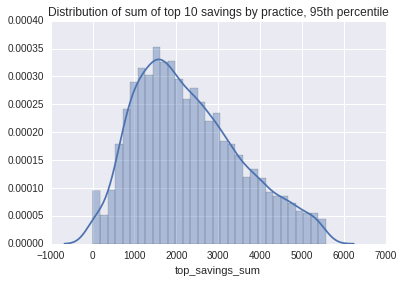

In [53]:
asd = top_10[top_10.top_savings_sum < top_10.top_savings_sum.quantile(.95)]
g = sns.distplot(asd.top_savings_sum)
plt.title("Distribution of sum of top 10 savings by practice, 95th percentile")
plt.show()

In [54]:
reload(price_utils)
top_10_pct = price_utils.top_savings_per_entity(top_n=10, entity='pct')

In [55]:
top_10_pct.describe()

,top_savings_sum
count,£213.00
mean,"£60,540.26"
std,"£34,362.13"
min,£47.38
25%,"£38,327.64"
50%,"£52,893.36"
75%,"£74,182.63"
max,"£213,752.72"


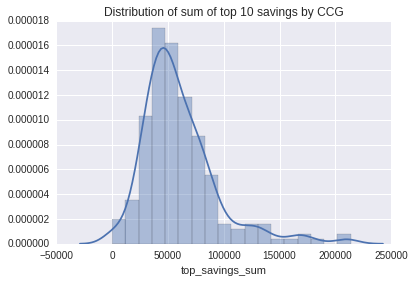

In [56]:
sns.distplot(top_10_pct.top_savings_sum)
plt.title("Distribution of sum of top 10 savings by CCG")
plt.show()

In [57]:
reload(price_utils)
top_1000_product = price_utils.get_savings(group_by='product', month=month, limit=1000)


In [58]:
top_1000_product.head(5)


,bnf_presentation,bnf_chemical,generic_presentation,category,brand_count,lowest_decile,quantity,price_per_dose,possible_savings
0,Influenza_Vac Inact 0.5ml Pfs,Influenza,1404000H0AAAFAF,NP8,215,£5.85,201086,£8.66,"£389,954.01"
1,Fluticasone/Salmeterol_Inh 250/25mcg120D,Fluticasone Propionate (Inh),0302000N0AABGBG,C,276,£44.61,12509,£59.10,"£179,897.26"
2,Methocarbamol_Tab 750mg,Methocarbamol,1002020S0AAABAB,A,57,£0.13,209242,£0.50,"£79,066.30"
3,Co-Proxamol_Tab 32.5mg/325mg,Co-Proxamol (Dextroprop HCl/Paracet),0407010Q0AAAAAA,NP8,40,£0.70,38736,£3.07,"£76,277.45"
4,Budesonide/Formoterol Inh B/A 200/6(120D,Budesonide,0302000K0AAAMAM,C,98,£29.97,6495,£37.49,"£48,533.32"


In [59]:
top_10.head(5)

,practice,top_savings_sum
0,A81001,"£3,074.54"
1,A81002,"£7,418.91"
2,A81003,"£1,871.87"
3,A81004,"£2,929.29"
4,A81005,"£2,912.24"


In [60]:
reload(price_utils)
# A list of all the generic presentations in the top three savings for each practice
df = price_utils.all_presentations_in_per_entity_top_n(top_n=3, entity='practice', month='2016-09-01')

In [61]:
# Total savings if each practice enacted its top three savings
df.top_savings_sum.sum()

9880837.8072093762

In [62]:
reload(price_utils)
# A list of all the generic presentations in the top one savings for each practice
df2 = price_utils.all_presentations_in_per_entity_top_n(top_n=1, entity='practice', month='2016-09-01')

In [63]:
df2.top_savings_sum.sum()

4782346.2748318911

In [64]:
# The top savings by presentation if each practice enacted its top three savings
by_presentation = df.groupby('presentation').top_savings_sum.sum().sort_values(inplace=False, ascending=False)
by_presentation.head()

presentation
Influenza_Vac Inact 0.5ml Pfs              £1,242,817.16
Fluticasone/Salmeterol_Inh 250/25mcg120D   £1,221,392.06
Pregabalin_Cap 75mg                         £761,735.33 
Budesonide/Formoterol Inh B/A 200/6(120D    £663,181.64 
Venlafaxine_Cap 150mg M/R                   £447,165.73 
Name: top_savings_sum, dtype: float64

In [65]:
# The top savings by chemical if each practice enacted its top three savings
by_subpara = df.groupby('chemical').top_savings_sum.sum().sort_values(inplace=False, ascending=False)
by_subpara.head(10)

chemical
Fluticasone Propionate (Inh)   £1,430,289.56
Influenza                      £1,242,817.16
Budesonide                      £873,140.83 
Pregabalin                      £766,428.04 
Venlafaxine                     £547,738.32 
Enteral Nutrition               £543,218.91 
Levetiracetam                   £318,966.45 
Lamotrigine                     £283,224.28 
Colecalciferol                  £256,777.05 
Methocarbamol                   £238,352.45 
Name: top_savings_sum, dtype: float64

In [66]:
# The top savings by chemical if each practice enacted its top saving
by_chemical2 = df2.groupby('chemical').top_savings_sum.sum().sort_values(inplace=False, ascending=False)
by_chemical2.head(10)

chemical
Influenza                              £808,823.29
Fluticasone Propionate (Inh)           £646,125.38
Budesonide                             £291,969.58
Enteral Nutrition                      £286,083.00
Pregabalin                             £233,936.44
Venlafaxine                            £181,832.97
Colecalciferol                         £151,371.20
Methocarbamol                          £151,015.16
Dalteparin Sodium                      £136,769.04
Co-Proxamol (Dextroprop HCl/Paracet)   £131,216.04
Name: top_savings_sum, dtype: float64

In [67]:
d = {}
for threshold in [10, 110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]:
    d[threshold] = price_utils.cost_savings_at_minimum_for_practice(threshold, month='2016-09-01').top_savings_sum.sum()
d

{10: 42577492.998559892,
 110: 24070146.385977529,
 210: 15850987.336046427,
 310: 11175539.989561666,
 410: 8175621.3288398702,
 510: 6206880.8011679696,
 610: 4823176.9080976434,
 710: 3832930.5783390491,
 810: 3124508.2195024192,
 910: 2594347.5005505867,
 1010: 2217651.8643086124}

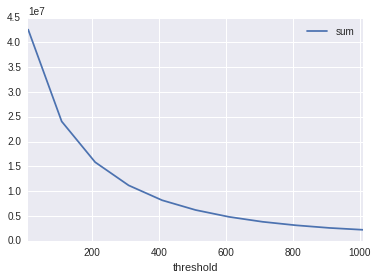

In [68]:
pd.options.display.float_format = None
asd = pd.DataFrame(d.items())
asd.columns = ['threshold', 'sum']
s = asd.sort_values('threshold')
s.plot(x='threshold', y='sum')

## Visualising distributions of drug prices

### 1. Some branded drugs that show significant variation 

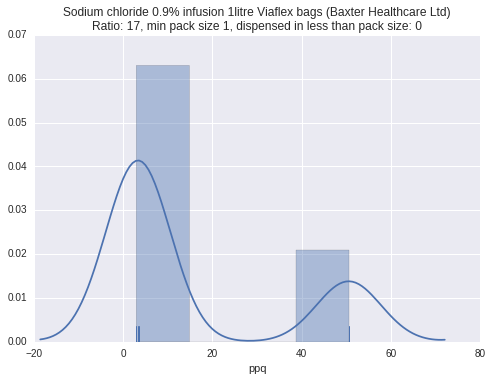

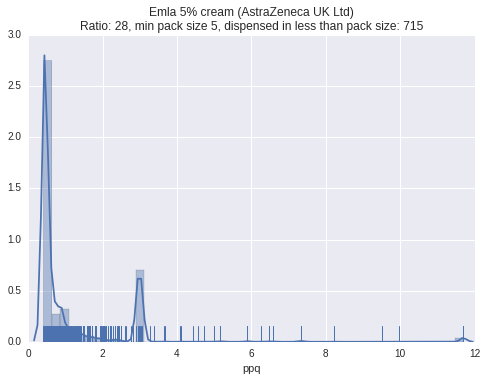

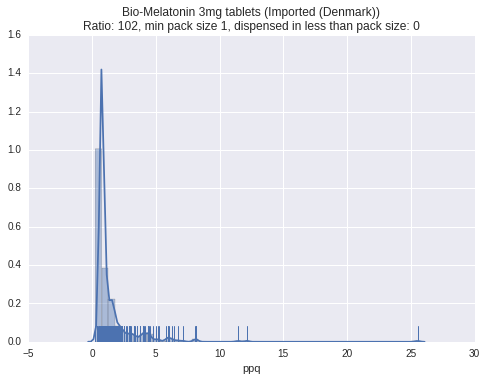

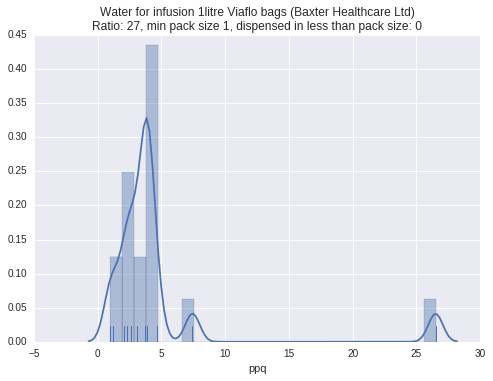

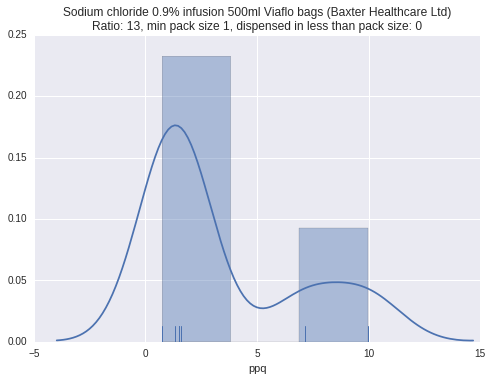

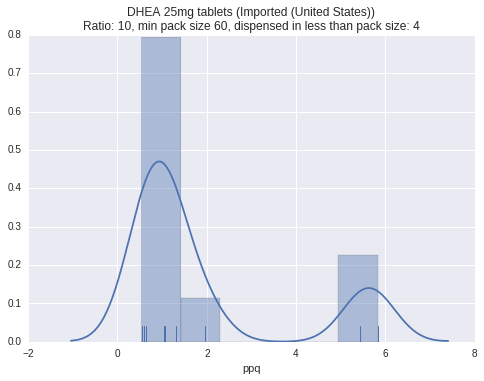

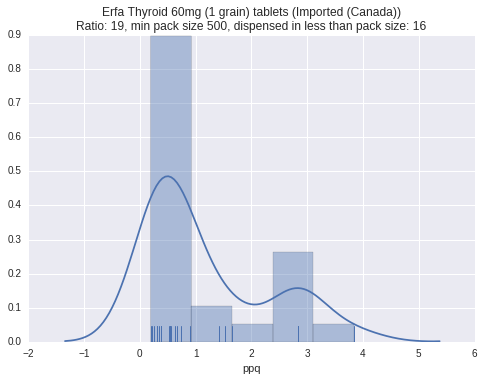

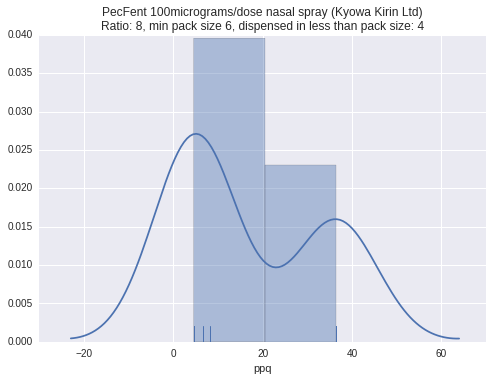

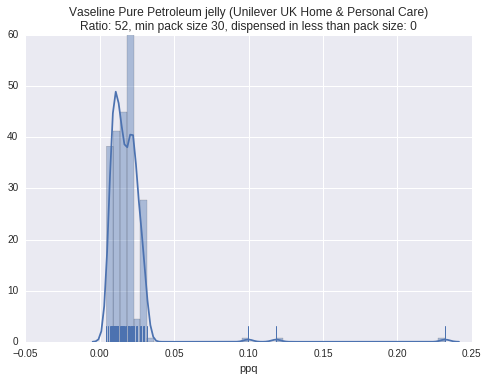

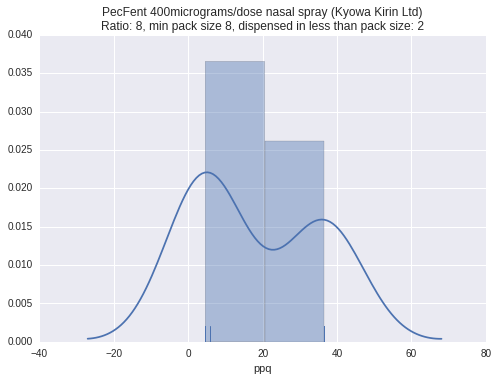

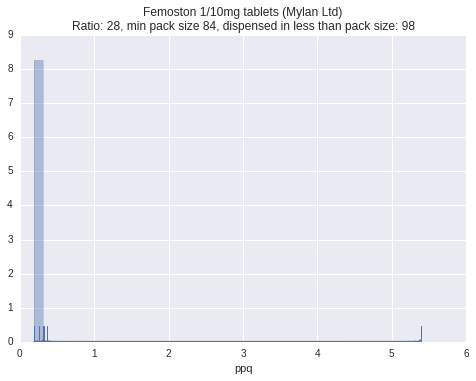

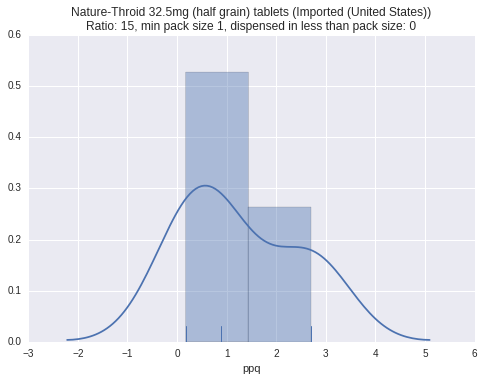

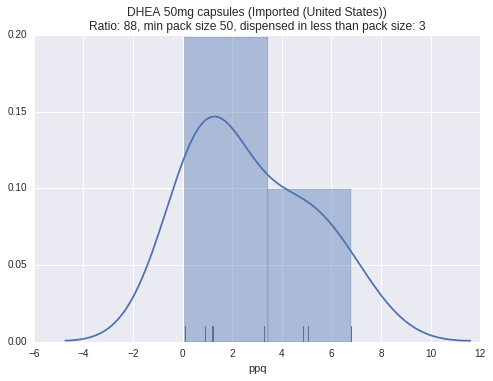

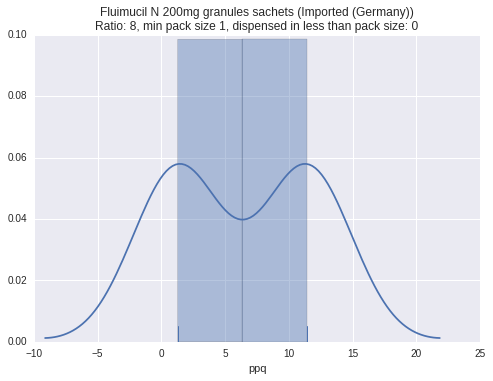

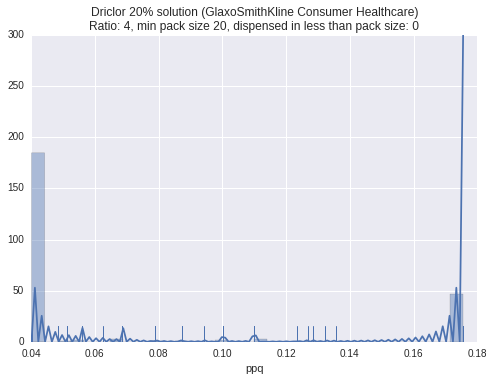

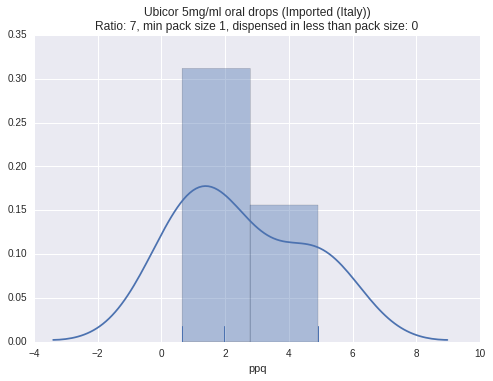

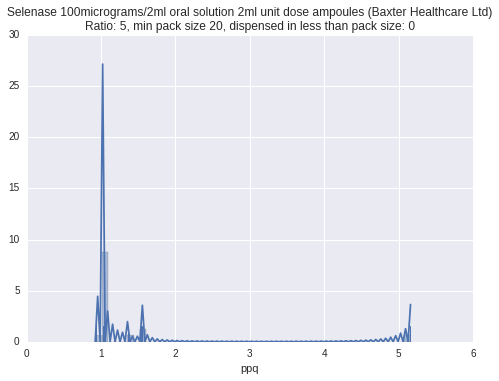

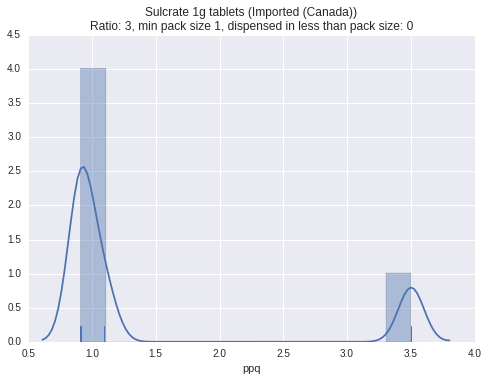

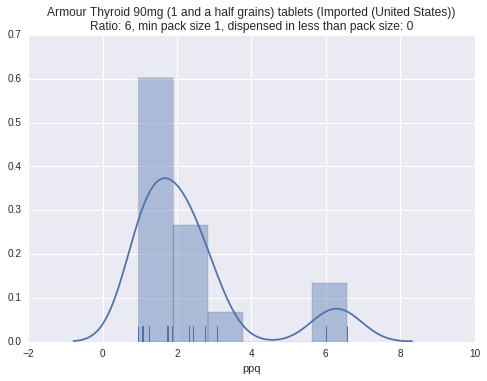

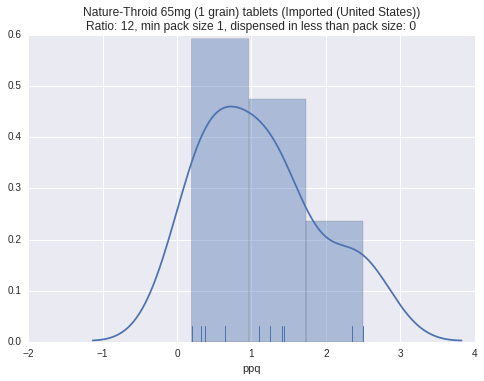

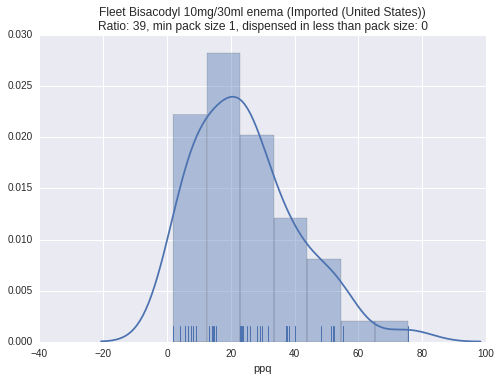

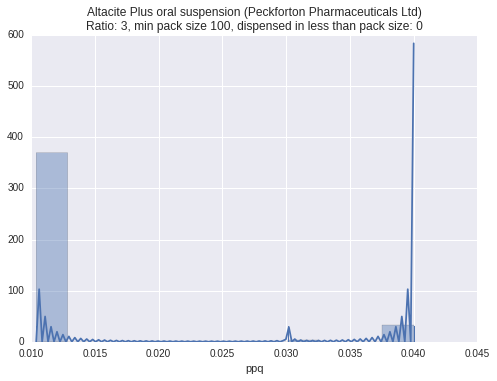

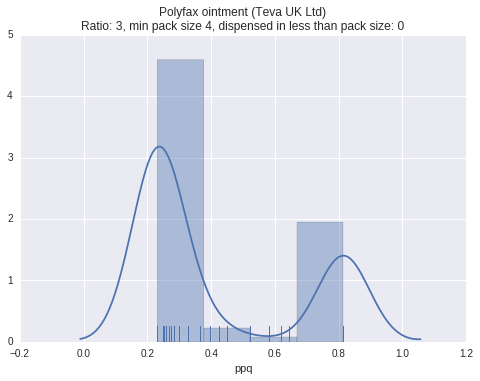

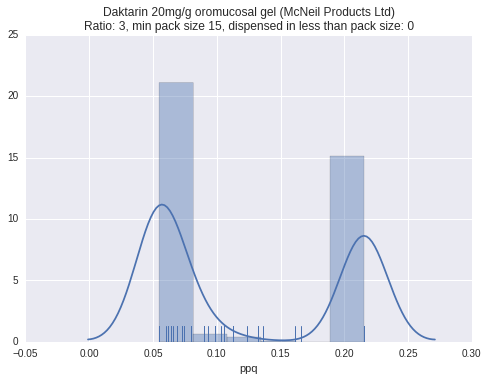

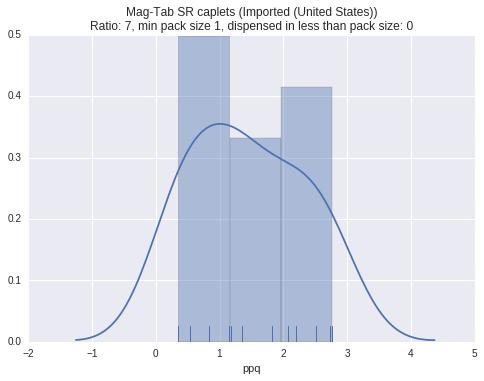

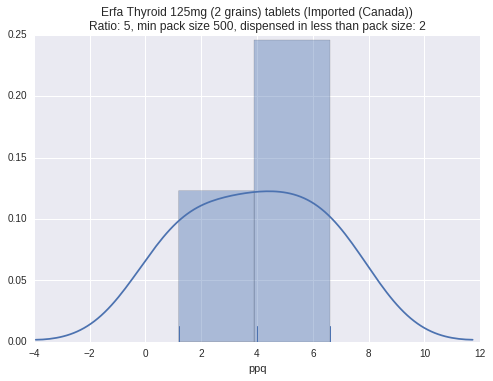

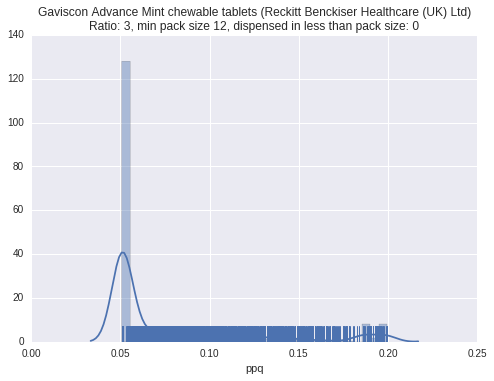

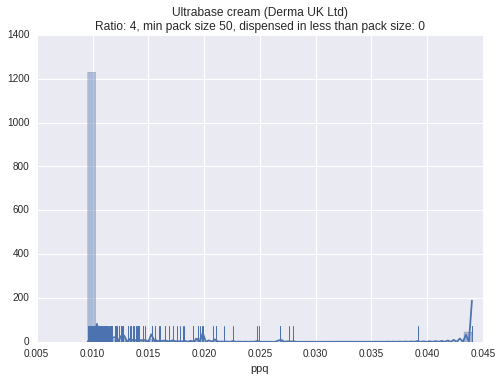

ValueError: need more than 1 value to unpack

In [2]:
subjects = """0902021S0BBAJAZ	Sodium chloride 0.9% infusion 1litre Viaflex bags (Baxter Healthcare Ltd)
1502010J0BEAABY	Emla 5% cream (AstraZeneca UK Ltd)
0401010ADBCBZBP	Bio-Melatonin 3mg tablets (Imported (Denmark))
0902021X0BGACAZ	Water for infusion 1litre Viaflo bags (Baxter Healthcare Ltd)
0902021S0BBAXAY	Sodium chloride 0.9% infusion 500ml Viaflo bags (Baxter Healthcare Ltd)
0604030Q0BBAFAI	DHEA 25mg tablets (Imported (United States))
0602010Z0BEABAJ	Erfa Thyroid 60mg (1 grain) tablets (Imported (Canada))
0407020A0BPAABN	PecFent 100micrograms/dose nasal spray (Kyowa Kirin Ltd)
1302010N0BDAAAA	Vaseline Pure Petroleum jelly (Unilever UK Home & Personal Care)
0407020A0BPABBP	PecFent 400micrograms/dose nasal spray (Kyowa Kirin Ltd)
0604011L0BKACAP	Femoston 1/10mg tablets (Mylan Ltd)
0602010Z0BDABAA	Nature-Throid 32.5mg (half grain) tablets (Imported (United States))
0604030Q0BBACAC	DHEA 50mg capsules (Imported (United States))
0307000C0BDAAAA	Fluimucil N 200mg granules sachets (Imported (Germany))
1312000C0BCAAAS	Driclor 20% solution (GlaxoSmithKline Consumer Healthcare)
091102000BBIDBD	Ubicor 5mg/ml oral drops (Imported (Italy))
0905050A0BBAAAA	Selenase 100micrograms/2ml oral solution 2ml unit dose ampoules (Baxter Healthcare Ltd)
0103030S0BCAAAA	Sulcrate 1g tablets (Imported (Canada))
0602010Z0BBAGAC	Armour Thyroid 90mg (1 and a half grains) tablets (Imported (United States))
0602010Z0BDAAAB	Nature-Throid 65mg (1 grain) tablets (Imported (United States))
0106020C0BEAAAJ	Fleet Bisacodyl 10mg/30ml enema (Imported (United States))
0101010P0BBAAAA	Altacite Plus oral suspension (Peckforton Pharmaceuticals Ltd)
1310011W0BCAAAB	Polyfax ointment (Teva UK Ltd)
1203020H0BBAAAA	Daktarin 20mg/g oromucosal gel (McNeil Products Ltd)
0905013P0BBAAAA	Mag-Tab SR caplets (Imported (United States))
0602010Z0BEAAAI	Erfa Thyroid 125mg (2 grains) tablets (Imported (Canada))
0101021B0BEAQAP	Gaviscon Advance Mint chewable tablets (Reckitt Benckiser Healthcare (UK) Ltd)
130201000BBAHAV	Ultrabase cream (Derma UK Ltd)"""
import sqlite3
con = sqlite3.connect("dmd.db")
for subject in subjects.split("\n"):
    code, title = subject.split("\t", 1)
    sql = """  SELECT
        *
      FROM
        ebmdatalab.tmp_eu.prescribing_sept
      WHERE
        bnf_code = '%s'""" % code
    df = pd.io.gbq.read_gbq(
        sql, project_id="ebmdatalab", verbose=False, dialect='standard')
    df['ppq'] = df['net_cost'] / df['quantity']
    df = df.sort_values('ppq')
    cheapest = float(df[['quantity', 'net_cost', 'ppq']].head(1)['ppq'].iloc[0])
    expensivest = float(df[['quantity', 'net_cost', 'ppq']].tail(1)['ppq'].iloc[0])
    ratio = int(expensivest / cheapest)

    sql = "select MIN(VMPP.QTYVAL) from dmd_product inner join AMP on dmd_product.DMDID = AMP.APID  inner join VMPP on AMP.VPID = VMPP.VPID where BNF_CODE = '%s'" % code
    min_pack_size = int(pd.read_sql_query(sql, con).iloc[0])
    dispensed_in_packs = len(df[df.quantity < min_pack_size])
    sns.distplot(df['ppq'], rug=True)
    sns.plt.title("%s\nRatio: %s, min pack size %s, dispensed in less than pack size: %s" % (title, ratio, min_pack_size, dispensed_in_packs))
    sns.plt.show()
